# Clustering Countries

This notebook contains the incomplete work we did on clustering the countries. We wanted to make use of these clusters for modeling, but ran out of time.

## Using this notebook to try and cluster the countries

### Much of our clustering work was done in R so recommend using the R Kernel and code for these runs

In [3]:
install.packages("dbscan")
install.packages("fpc")
install.packages("factoextra")
install.packages("NbClust")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘cluster’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’

Warning message in install.packages("fpc"):
“installation of package ‘kernlab’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘fpc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“dependency ‘foreign’ is not available”also installing the dependencies ‘processx’, ‘diffobj’, ‘rematch2’, ‘brio’, ‘callr’, ‘desc’, ‘pkgload’, ‘praise’, ‘ps’, ‘waldo’, ‘withr’, ‘testthat’, ‘glue’, ‘pillar’, ‘cli’, ‘ellipsis’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘isoband’, ‘rlang’, ‘dplyr’, ‘lifecycle’, ‘vctrs’, ‘cpp11’, ‘tibble’, ‘viridisLite’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘jquerylib’, ‘ggp

In [4]:
# Libraries

# Can't seem to be able to install needed libraries fpc and factoextra for dbscan

library(dplyr)
library(tidyr)
library(ggplot2)
library(dbscan)
#library("fpc")
#library("factoextra")
library(NbClust)

In [5]:
# /dsa/groups/capstonesp2022/online/group_3/completeDF.csv

df <- read.csv('../../carpentry/completeDF.csv')

#df.drop('Unnamed: 0', axis = 1, inplace = True)

head(df, n=5)

ERROR while rich displaying an object: Error in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]): namespace ‘rlang’ 0.4.0 is already loaded, but >= 1.0.2 is required

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, 

  X Year SPPOPAG17FEIN SPPOPAG18FEIN SPPOPAG18MAIN SPPOPAG19FEIN SPPOPAG19MAIN
1 0 1990 31302         31021         32548         30668         32123        
2 1 1991 30799         30581         31517         30242         31018        
3 2 1992 30234         30020         30401         29741         29824        
4 3 1993 29773         29452         29474         29176         28760        
5 4 1994 29452         29045         29038         28661         28126        
  SPPOPAG20FEIN SPPOPAG20MAIN SPPOPAG21FEIN ⋯ BIRTHTOTL DEATHTOTL NETPOP
1 30319         31701         29918         ⋯ 81726     19670     62056 
2 29838         30491         29440         ⋯ 79203     19839     59364 
3 29345         29203         28890         ⋯ 76400     19986     56414 
4 28836         28038         28385         ⋯ 73395     20061     53334 
5 28322         27251         27922         ⋯ 70251     20047     50204 
  YOYGROWTOTL YOYGROWPCT IMMIGRATION ADJPOPTOTL YOYORGGROW percentMissing
1  58599      

In [6]:
# Drop country name for now
# Will need to drop additional features

drops <- c("CountryName")
df2 <- df[,(!names(df) %in% drops)]

## Begin Clustering Models

References:

    - bi-clustering (8410)
    - clustering (7020)
    - excercise (7020) will be a good reference here

## K-Means

Considerations
- Run PCA before clustering to minimize potentially inflated Euclidean distances
- Countries names will not be able to be used as it is categorical and does not matter for this conversation so we need to drop

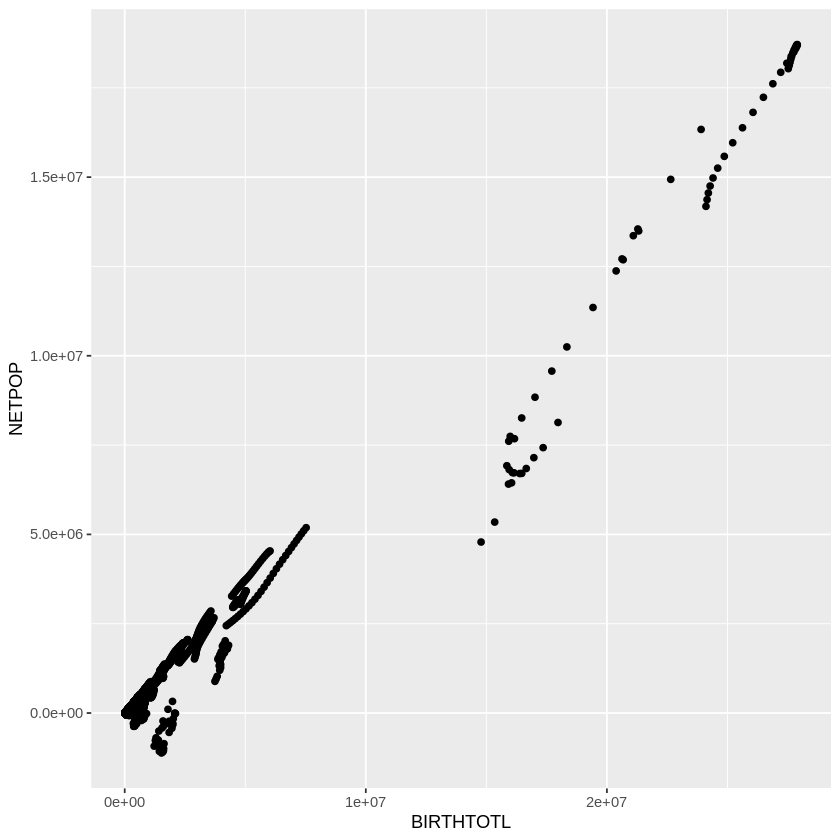

In [7]:
# BIRTHTOTL
# NETPOP

# working to get a baseline on countries plots to see if anything stands out. Starting with 2 data points

pop_plot <- ggplot(df2, aes(BIRTHTOTL, NETPOP)) + geom_point(color = "black")
pop_plot

Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

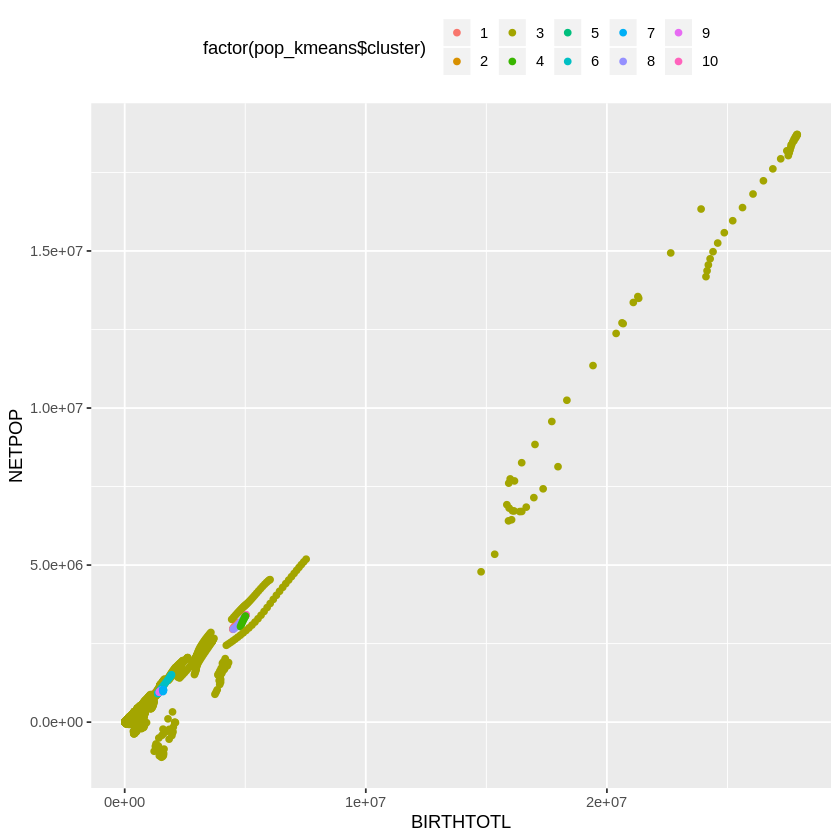

In [8]:
pop_kmeans <- kmeans(df2, 10, nstart = 20)
plot2 <- ggplot(df2, aes(BIRTHTOTL, NETPOP)) + geom_point(aes(color = factor(pop_kmeans$cluster))) + 
    theme(legend.position = "top")
plot2

## DBSCAN

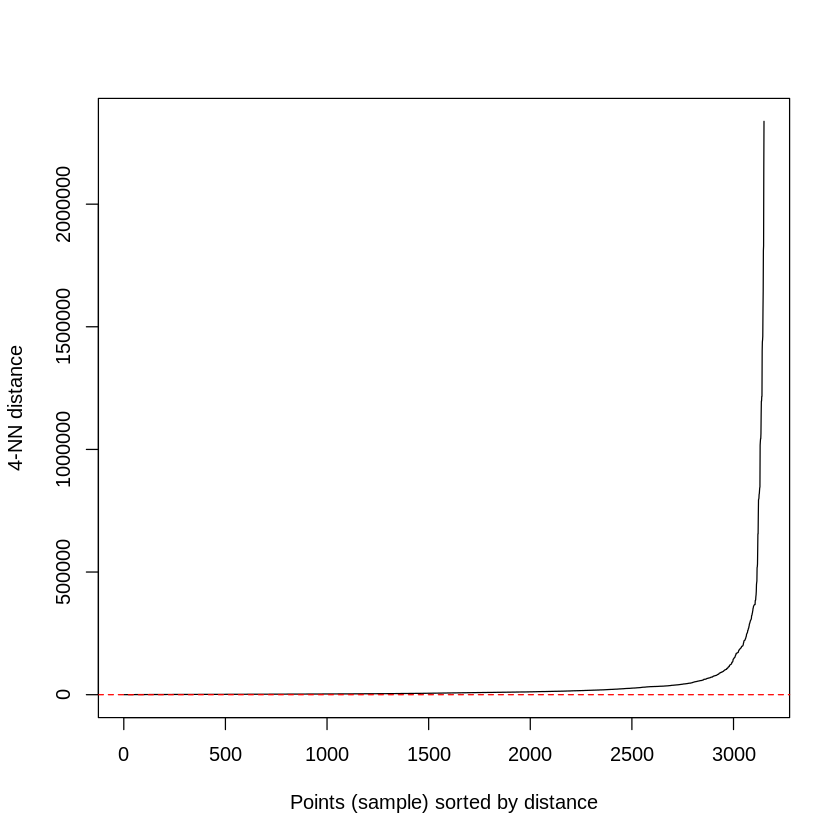

In [9]:
dbscan::kNNdistplot(df[,c("NETPOP","BIRTHTOTL")], k =  4)
abline(h = 0.4, lty = 2,col='red')

In [10]:
install.packages("fpc")
library("fpc")
set.seed(42)
db <- fpc::dbscan(df2[,c("NETPOP","BIRTHTOTL")], eps = 0.4, MinPts = 4)
# Plot DBSCAN results
plot(db, df2[,c("NETPOP","BIRTHTOTL")], main = "DBSCAN", frame = FALSE)

also installing the dependency ‘kernlab’

Warning message in install.packages("fpc"):
“installation of package ‘kernlab’ had non-zero exit status”Warning message in install.packages("fpc"):
“installation of package ‘fpc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library("fpc"): there is no package called ‘fpc’


In [12]:
R.version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          5.1                         
year           2018                        
month          07                          
day            02                          
svn rev        74947                       
language       R                           
version.string R version 3.5.1 (2018-07-02)
nickname       Feather Spray               